# Q1: Create a fully-connected model to recognize fashion mnist class
# Criteria:
- Fully connected
- No overfitting
- Draw confusion matrix

In [1]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKE5EDV/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKE5EDV/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
# Number of classes
len(metadata.features["label"].names)

10

In [8]:
# Classes
metadata.features["label"].names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
metadata.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [10]:
print(f'No of train : {len(train_dataset)}\nNo of test : {len(test_dataset)}')

No of train : 60000
No of test : 10000


In [11]:
# Normalization
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

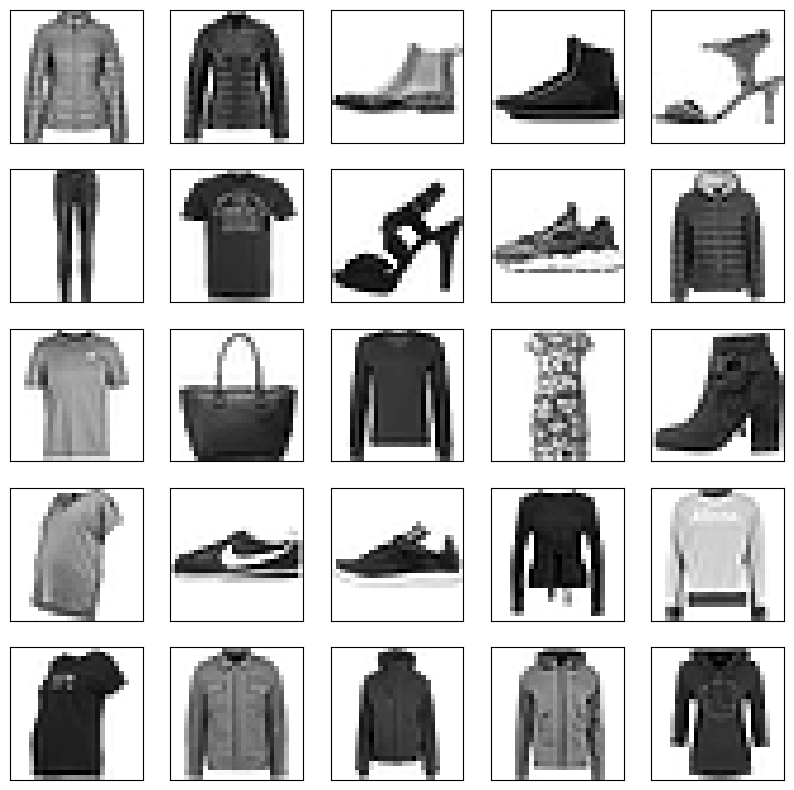

In [17]:
# Plot test sample
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    #image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [18]:
# Convert to batches
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

## Model

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
hist = model.fit(train_dataset, epochs=8, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2768 - accuracy: 0.8970
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2683 - accuracy: 0.9012
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2572 - accuracy: 0.9046
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2494 - accuracy: 0.9068
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2328 - accuracy: 0.9127
Epoch 6/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2314 - accuracy: 0.9147
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2191 - accuracy: 0.9175
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2171 - accuracy: 0.9190


In [23]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.3405 - accuracy: 0.8842
Accuracy on test dataset: 0.8841999769210815


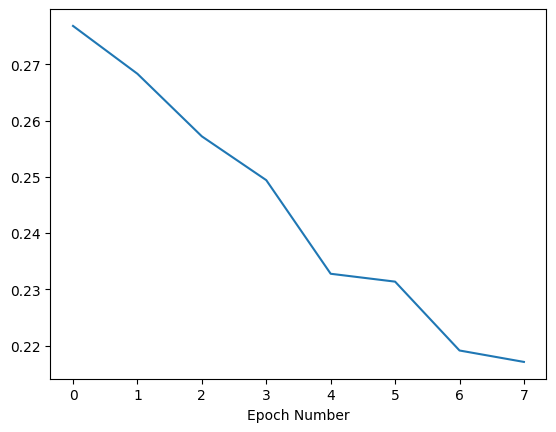

In [24]:
# How loss changes with epochs:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);

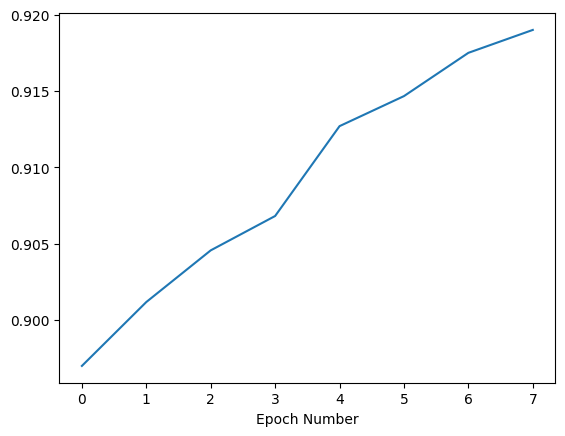

In [25]:
# How accuracy changes with epochs:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['accuracy']);

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Confusion Matrix

In [27]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [33]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [34]:
validation_batches = test_dataset.batch(BATCH_SIZE)
validation_batches

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

313/313 [==============================] - 1s 4ms/step


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

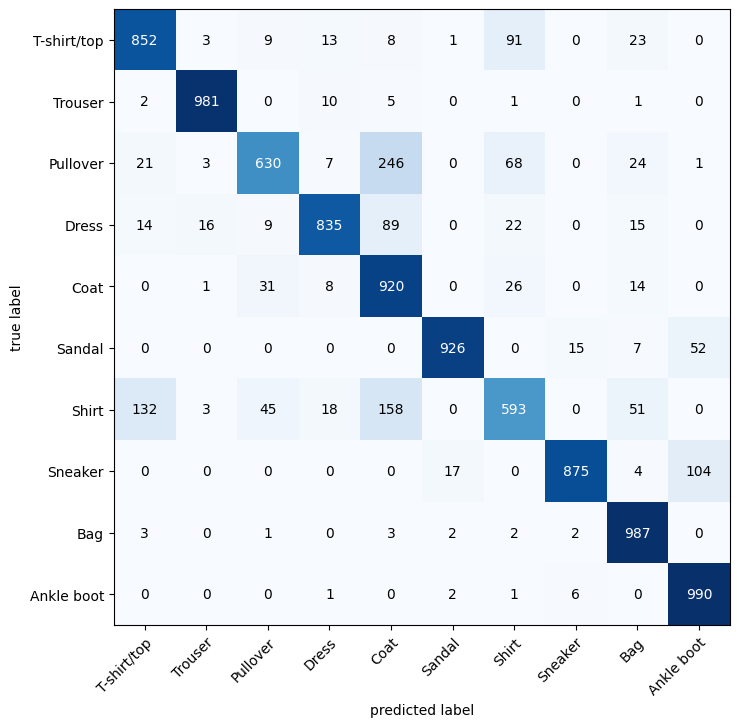

In [35]:
validation_batches = test_dataset.batch(BATCH_SIZE)

pred = model.predict(validation_batches)
pred = np.argmax(pred,axis=1)
true = tf.concat([y for x,y in validation_batches],axis=0)
mat = confusion_matrix(true,pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), class_names=metadata.features['label'].names)